# Getting Started

In this notebook we will see a brief tutorial about the usage of CATOPUMA for image segmentation. 
In this example we will see the basic usage of the ImageFeederOnTheFly interface, and them some customization,
like image preprocessing and data augmentation on the fly.


The tutorial is structured as follows:
   - Vanilla Usage of the ImageFeederOnTheFlys
   - Usage of the ImageFeederOnTheFly with custom preprocessing
   - Patch Wise Lazy loading

In [2]:
import os
import zipfile
import numpy as np
import urllib.request
import tensorflow as tf
from itertools import islice
import matplotlib.pyplot as plt
# import catopuma required classes

from catopuma.losses import DiceLoss
from catopuma.tensorflow.feeder import ImageFeederOnTheFly

2023-07-26 17:14:23.502495: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-26 17:14:23.596946: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-26 17:14:24.584263: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## ImageFeederOnTheFly vanilla usage

The ImageFeederOnTheFly is an interface that allows to load, augment and preprocess images and volumes loading one batch at time.
The basic requirements are: 
    - list of path to each image of the dataset
    - list of path to each corresponding target image

**Note** Each list must be ordered such that each image path have the corresponding target path in the same list position.

So, to correctly use the class, we have to buils these lists.

In tis example, we will use a single example image replicated several time to describe the ImageFeederOnTheFly behaviour.

The vanilla ImageFeederOnTheFly behaviour, simply load each batch and return image and target as they are, without anny preprocess or data augmentation

In [3]:
# first of all get all the volume to segment. I am taking all the 

train_images = 64 * ['./example_images/volume-0.nii-062.nii']
train_targets = 64 * ['./example_images/segmentation-0.nii-062.nii']


train_feeder = ImageFeederOnTheFly(img_paths=train_images, target_paths=train_targets, batch_size=16)

# the len of the train feeder it the number of full batches per epoch
print(len(train_feeder))

4


2023-07-26 17:14:36.097922: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-26 17:14:36.118980: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-26 17:14:36.119034: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-26 17:14:36.121153: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-26 17:14:36.121184: I tensorflow/compile

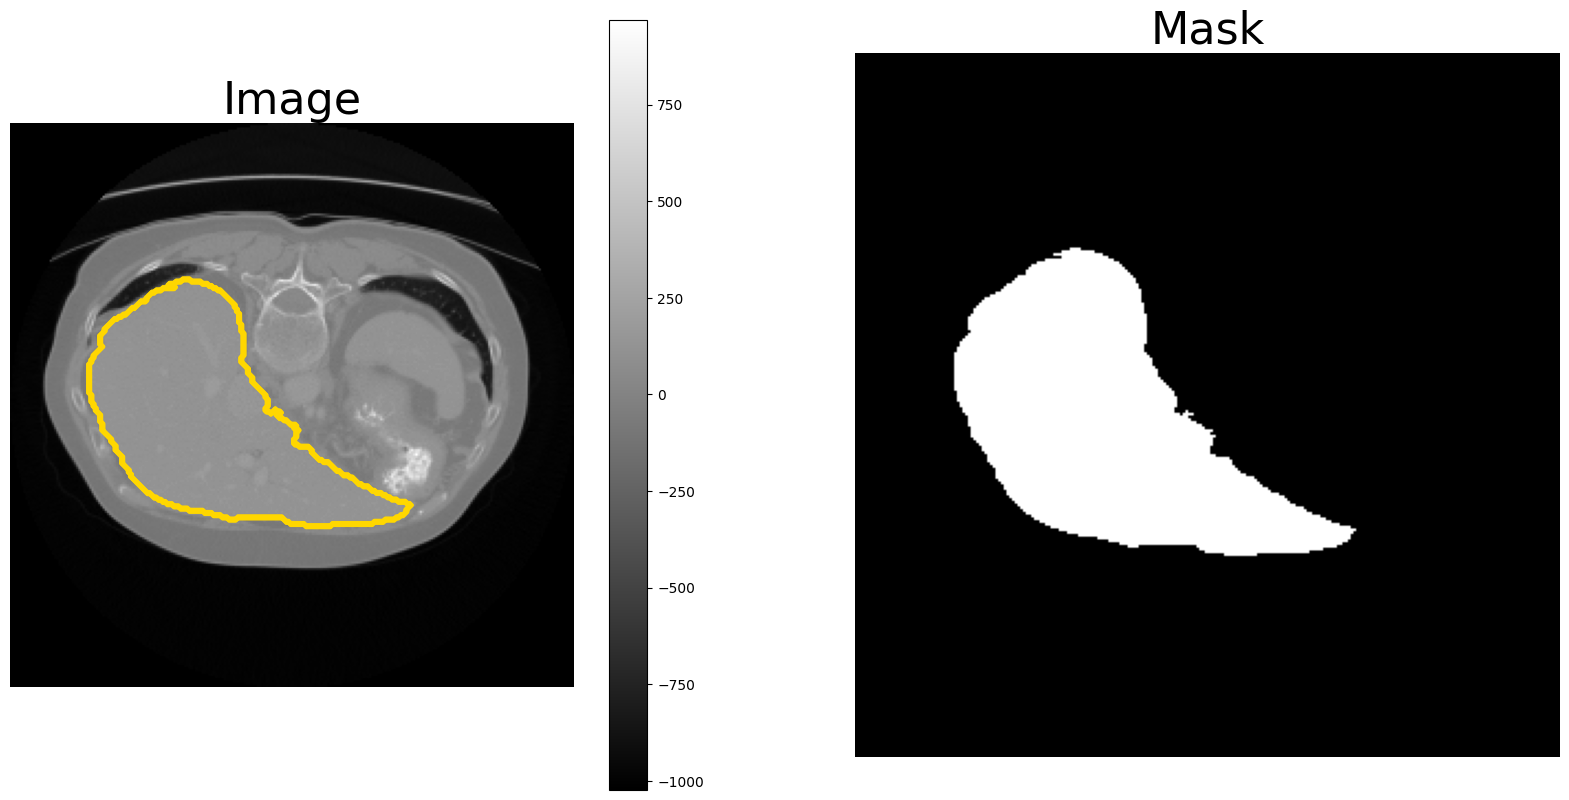

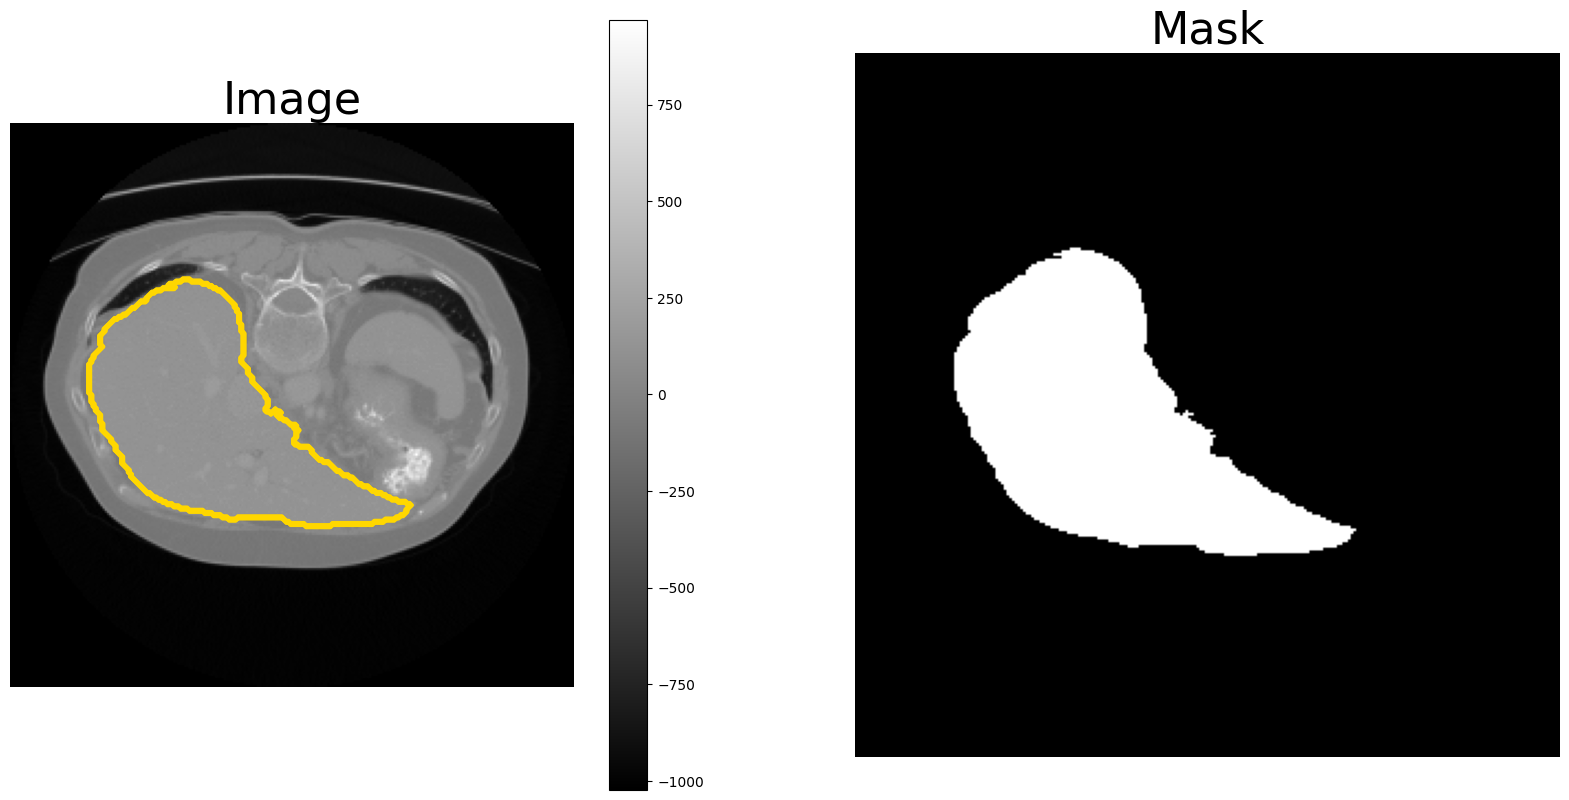

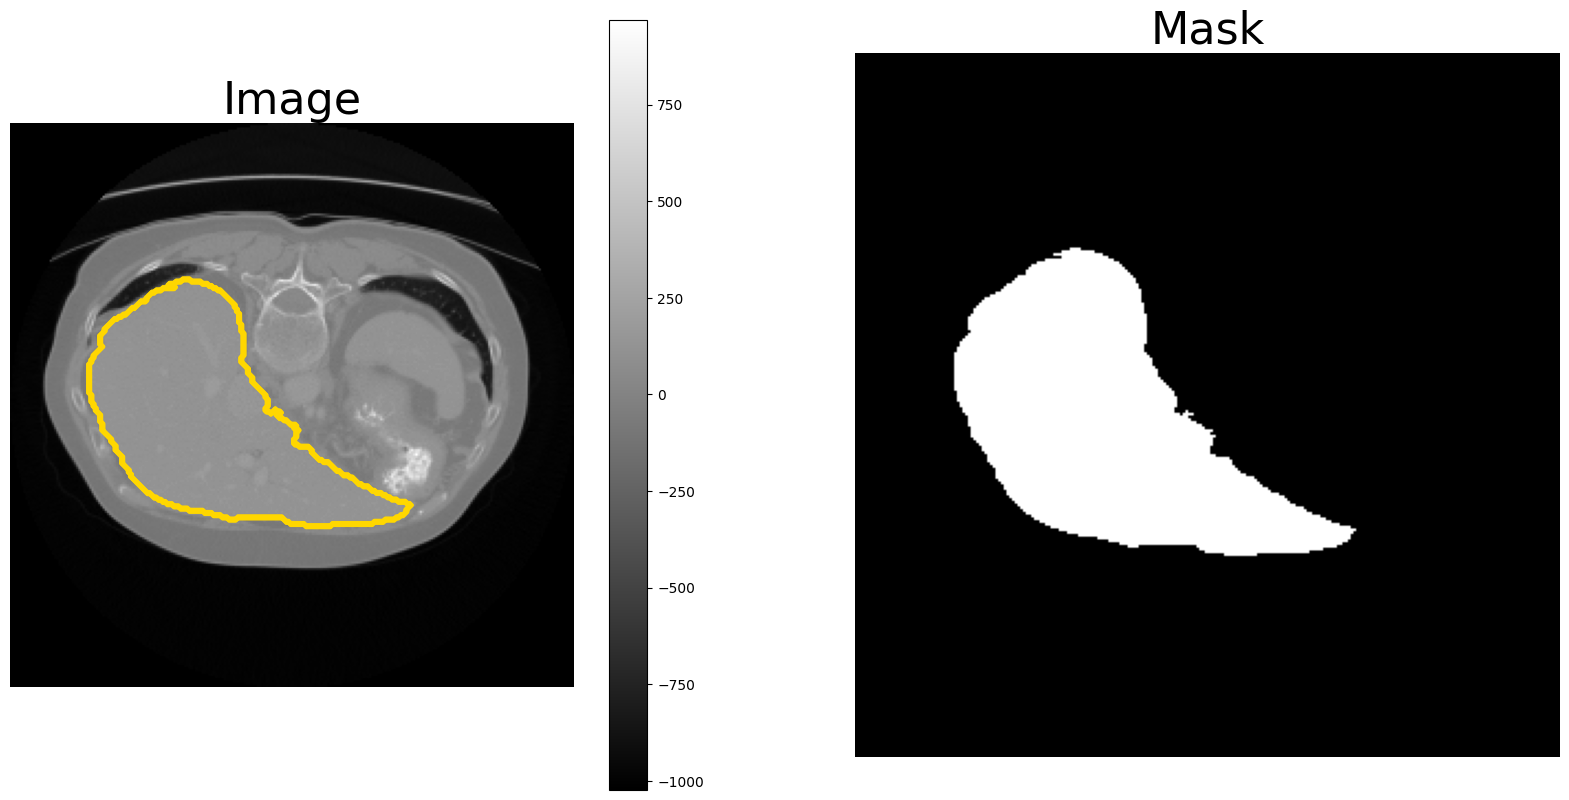

In [4]:
#
# Visualize Train Data Generator
#
for img, mask in islice(train_feeder, 3):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    ax[0].axis('off')
    _ = ax[0].imshow(img[0, ..., 0], cmap='gray')
    plt.colorbar(_)
    ax[0].contour(mask[0, ..., 0], colors='gold', linewidths=3)
    ax[0].set_title('Image', fontsize=32)

    ax[1].axis('off')
    ax[1].imshow(mask[0,..., 0], cmap='gray')
    ax[1].set_title('Mask', fontsize=32)

## Preprocess

CATOPUMA offer a simple way to preprocess the images on the fly. 
To preprocess the image, simply provide a preprocesser (given by catopuma) to the image feeder.

The standard catopuma preprocesser allows to standardize the image according to GL mean and standard deviation, or to rescale the GL intensities in [0, 1]. You can also decide to not apply any rescaling to the image. 
Last but non least, it offers also the possibility to chose 1 GL to use as label target, in case of multilabel images.

In [5]:
from catopuma.preprocessing import PreProcessing

In [7]:
# now we wil rescale the GL intensities in [0, 1] and select as target label the one corresponding to 1
preprocessing = PreProcessing(standardizer='rescale', target_label=1)

train_feeder = ImageFeederOnTheFly(img_paths=train_images, target_paths=train_targets, batch_size=16, preprocessing=preprocessing)

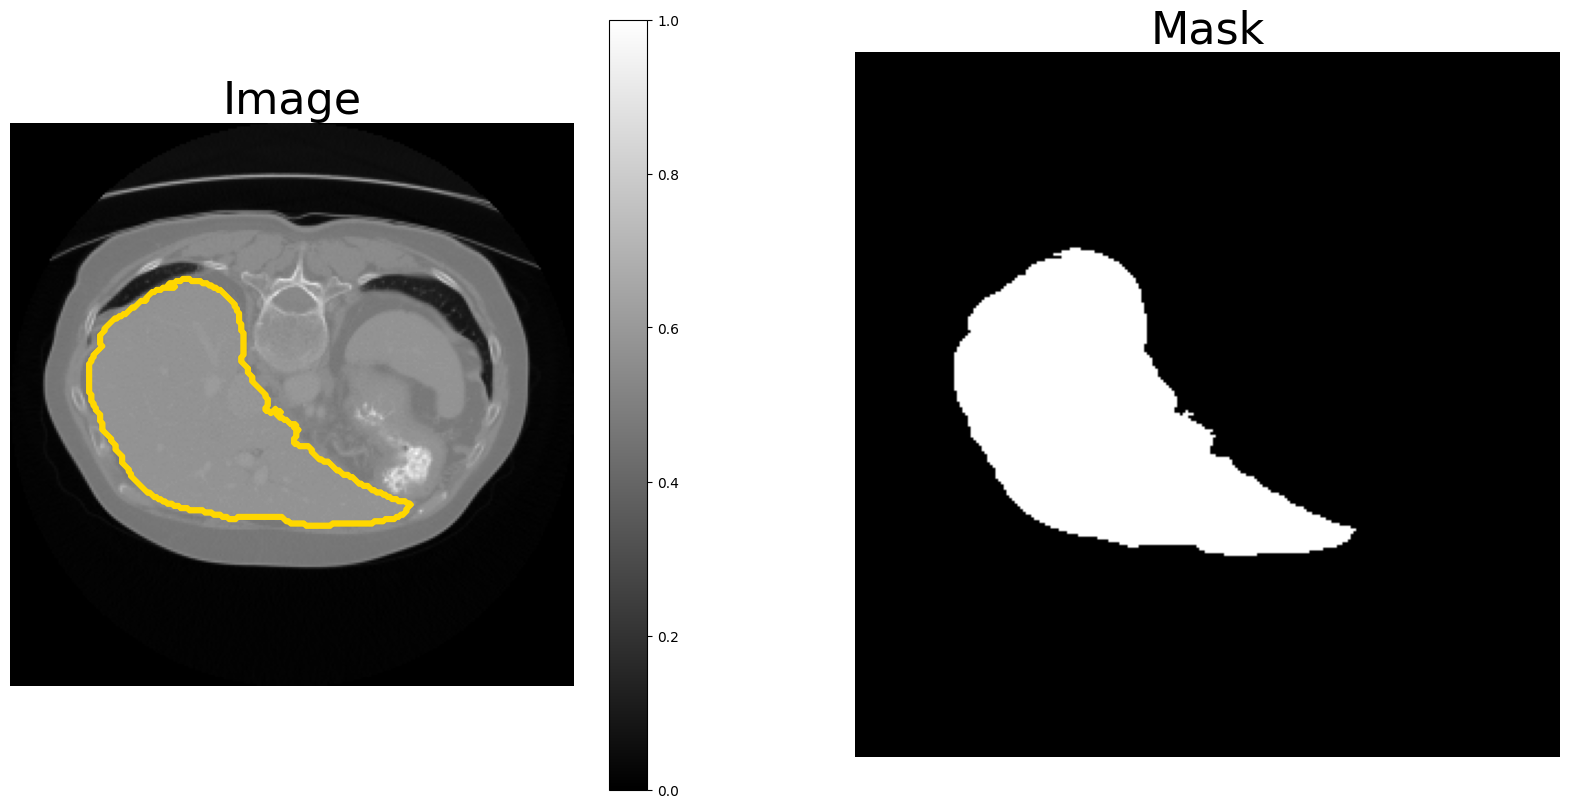

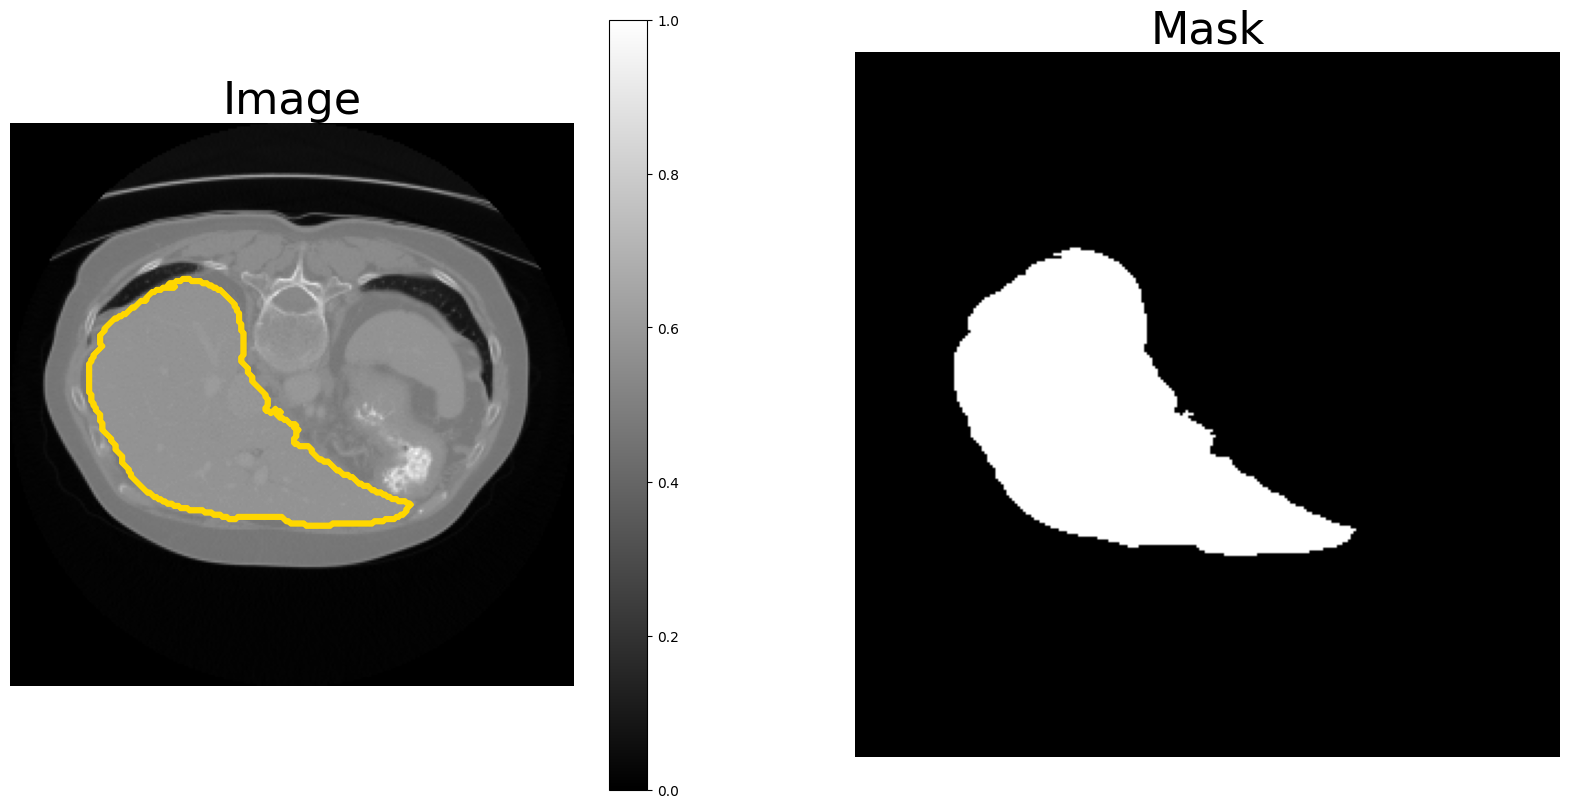

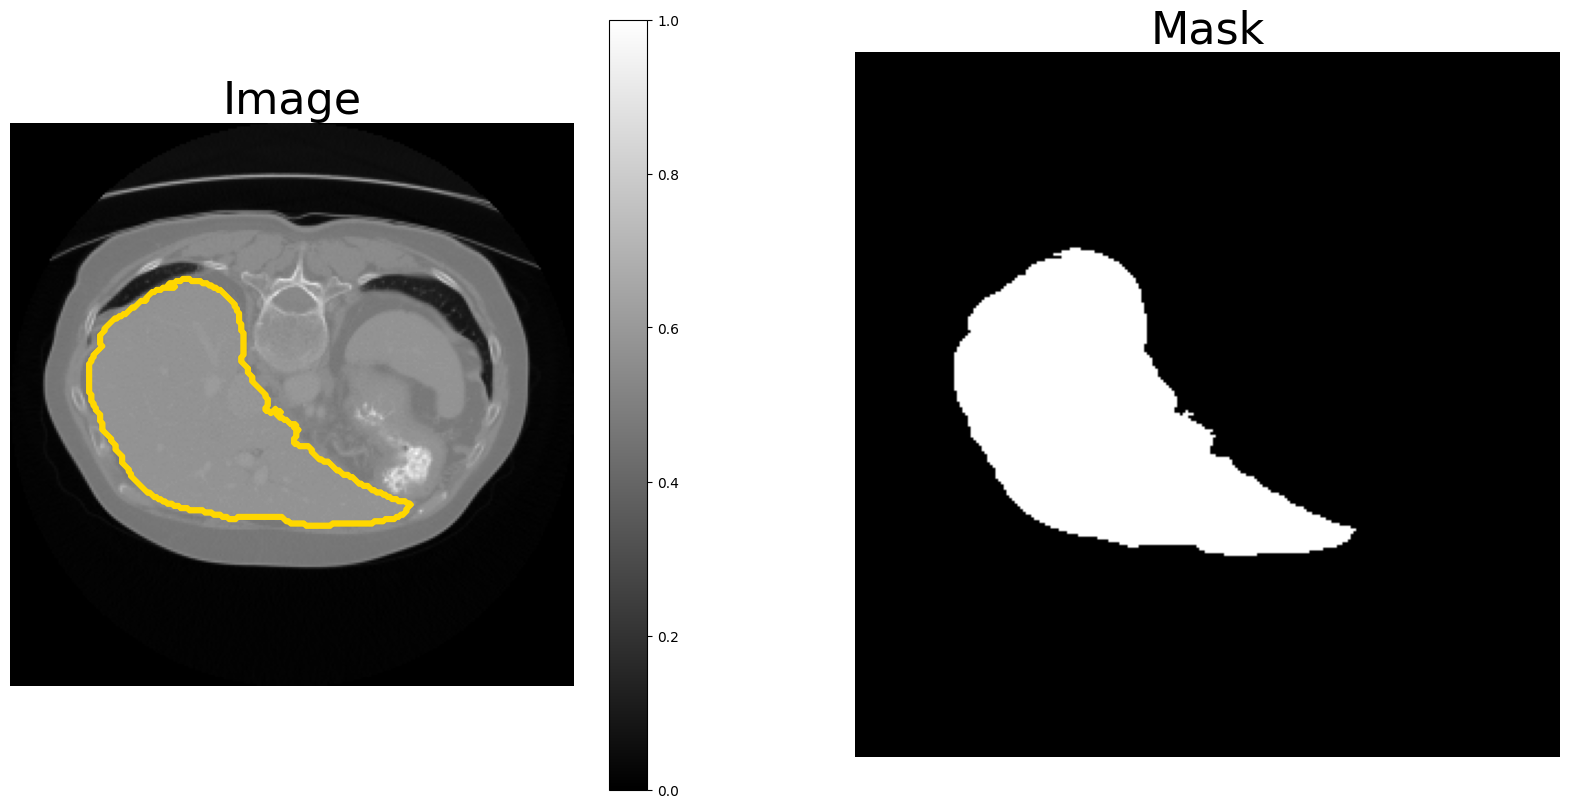

In [8]:
#
# Visualize Train Data Generator
#
for img, mask in islice(train_feeder, 3):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    ax[0].axis('off')
    _ = ax[0].imshow(img[0, ..., 0], cmap='gray')
    plt.colorbar(_)
    ax[0].contour(mask[0, ..., 0], colors='gold', linewidths=3)
    ax[0].set_title('Image', fontsize=32)

    ax[1].axis('off')
    ax[1].imshow(mask[0,..., 0], cmap='gray')
    ax[1].set_title('Mask', fontsize=32)

We can also chose an other gray level as target. In this case, since the example image has only 0 and 1 GL, we will obatain 
a  black image as target image if we chose a target different than 1, i.e. 2

In [9]:
# now we wil rescale the GL intensities in [0, 1] and select as target label the one corresponding to 1
preprocessing = PreProcessing(standardizer='rescale', target_label=2)

train_feeder = ImageFeederOnTheFly(img_paths=train_images, target_paths=train_targets, batch_size=16, preprocessing=preprocessing)

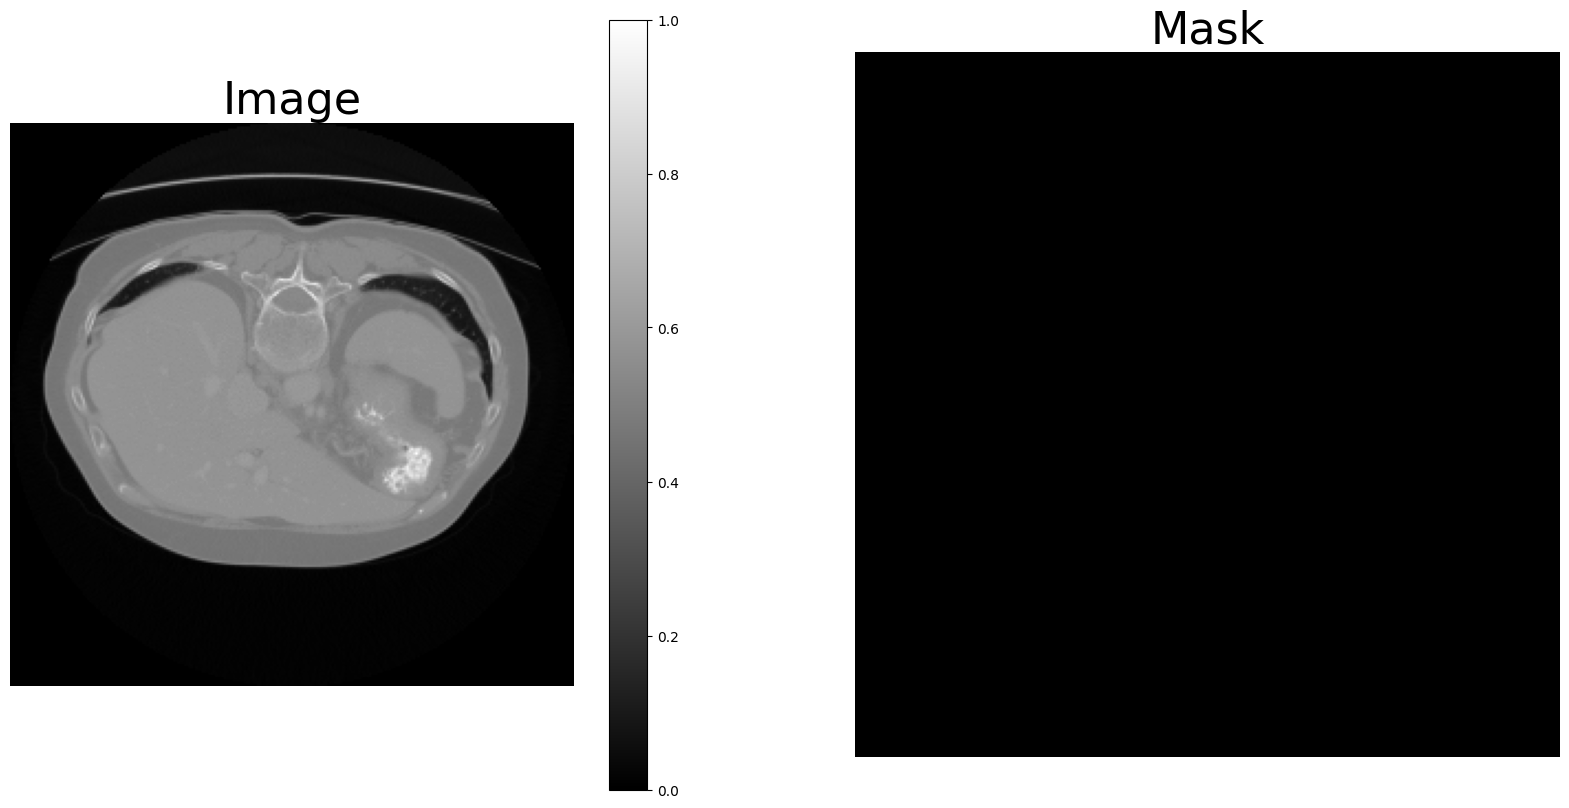

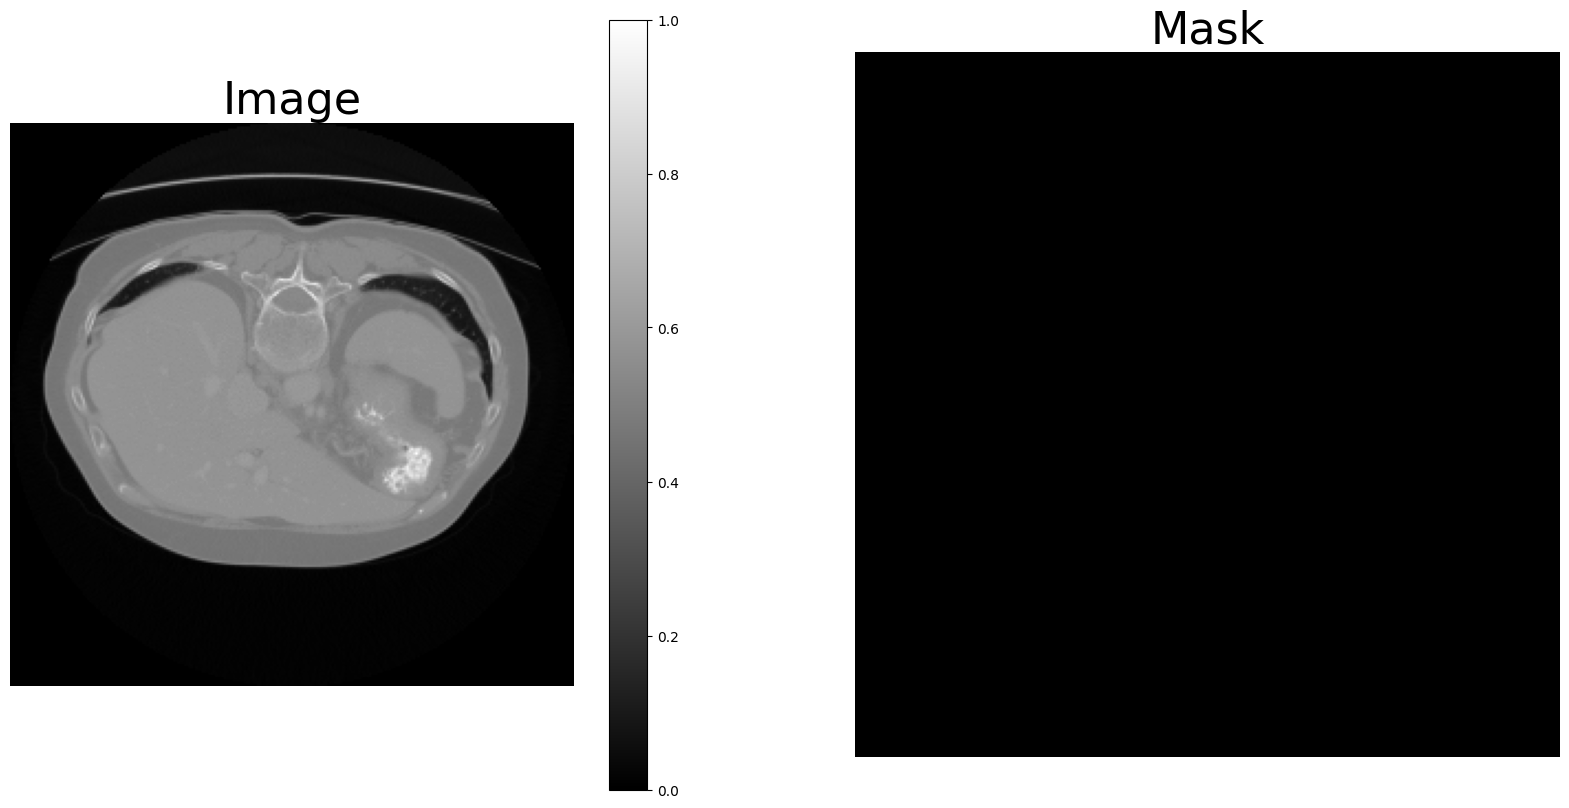

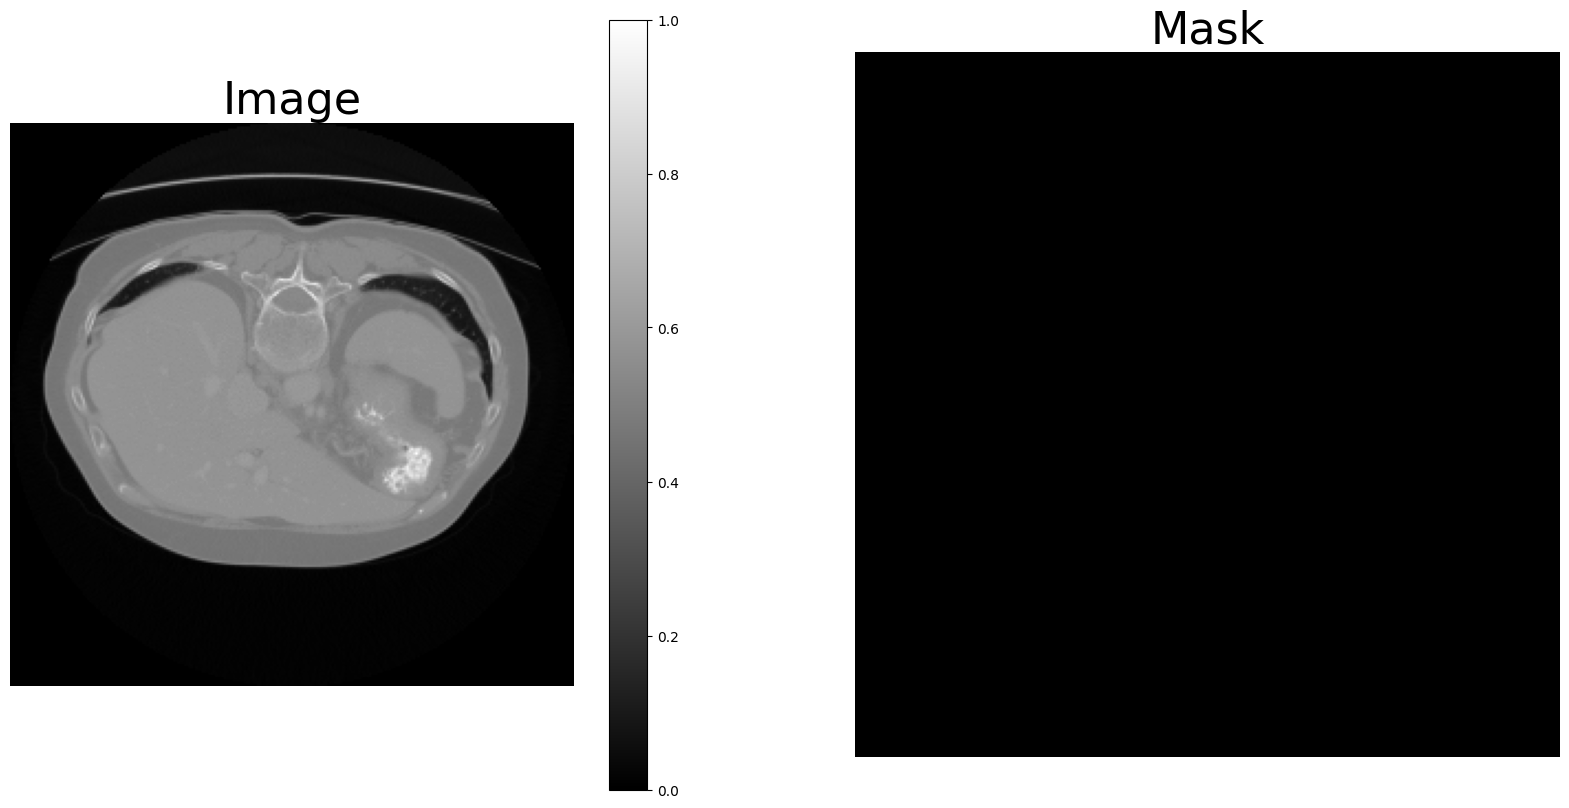

In [10]:
#
# Visualize Train Data Generator
#
for img, mask in islice(train_feeder, 3):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
    ax[0].axis('off')
    _ = ax[0].imshow(img[0, ..., 0], cmap='gray')
    plt.colorbar(_)
    ax[0].contour(mask[0, ..., 0], colors='gold', linewidths=3)
    ax[0].set_title('Image', fontsize=32)

    ax[1].axis('off')
    ax[1].imshow(mask[0,..., 0], cmap='gray')
    ax[1].set_title('Mask', fontsize=32)

## Patch Loader

CATOPUMA offers also a way to perform a patch-wise lazy loading. To perform such loading, you have to instatiate and pass to the feeder the ad hoc LazyLoader provided by CATOPUMA 

In [11]:
from catopuma.uploader import LazyPatchBaseUploader

In [ ]:
loader = LazyPatchBaseUploader(patch_size=(16, 16))